In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [150]:
data=pd.read_csv("mushroom.csv")

In [151]:
data.head()

,edibility,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurafcebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolr,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [152]:
x=data.iloc[:,1:23]

In [153]:
x.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurafcebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolr,ringnumber,ringtype,sporeprintcolor,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['edibility']=le.fit_transform(data['edibility'])

In [155]:
data['capshape']=le.fit_transform(data['capshape'])

In [156]:
data['capsurface']=le.fit_transform(data['capsurface'])

In [157]:
data['capcolor']=le.fit_transform(data['capcolor'])

In [158]:
data['bruises']=le.fit_transform(data['bruises'])

In [159]:
data['odor']=le.fit_transform(data['odor'])

In [160]:
data['gillattachment']=le.fit_transform(data['gillattachment'])

In [161]:
data['gillspacing']=le.fit_transform(data['gillspacing'])

In [162]:
data['gillsize']=le.fit_transform(data['gillsize'])

In [163]:
data['gillcolor']=le.fit_transform(data['gillcolor'])

In [164]:
data['stalkshape']=le.fit_transform(data['stalkshape'])

In [165]:
data['stalkroot']=le.fit_transform(data['stalkroot'])

In [166]:
data['stalksurfaceabovering']=le.fit_transform(data['stalksurfaceabovering'])

In [167]:
data['stalksurafcebelowring']=le.fit_transform(data['stalksurafcebelowring'])

In [168]:
data['stalkcolorabovering']=le.fit_transform(data['stalkcolorabovering'])


In [169]:
data['stalkcolorbelowring']=le.fit_transform(data['stalkcolorbelowring'])

In [170]:
data['veiltype']=le.fit_transform(data['veiltype'])

In [171]:
data['veilcolr']=le.fit_transform(data['veilcolr'])


In [172]:
data['ringnumber']=le.fit_transform(data['ringnumber'])

In [173]:
data['ringtype']=le.fit_transform(data['ringtype'])

In [174]:
data['sporeprintcolor']=le.fit_transform(data['sporeprintcolor'])

In [175]:
data['population']=le.fit_transform(data['population'])

In [176]:
data['habitat']=le.fit_transform(data['habitat'])

In [177]:
data.head()

,edibility,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurafcebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolr,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [178]:
y=data['edibility']

In [179]:
x=data.drop('edibility',axis=1)

In [180]:
x.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurafcebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolr,ringnumber,ringtype,sporeprintcolor,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [181]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: edibility, dtype: int32

In [182]:
x.shape

(8124, 22)

In [183]:
y.shape

(8124,)

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_acc_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 42 is 0.947076923076923
accuracy_score: 43 is 0.9489230769230769
accuracy_score: 44 is 0.9593846153846154
accuracy_score: 45 is 0.9513846153846154
accuracy_score: 46 is 0.9532307692307692
accuracy_score: 47 is 0.944
accuracy_score: 48 is 0.9513846153846154
accuracy_score: 49 is 0.9446153846153846
accuracy_score: 50 is 0.939076923076923
accuracy_score: 51 is 0.9483076923076923
accuracy_score: 52 is 0.9427692307692308
accuracy_score: 53 is 0.9507692307692308
accuracy_score: 54 is 0.952
accuracy_score: 55 is 0.9538461538461539
accuracy_score: 56 is 0.9464615384615385
accuracy_score: 57 is 0.9452307692307692
accuracy_score: 58 is 0.9538461538461539
accuracy_score: 59 is 0.9483076923076923
accuracy_score: 60 is 0.9513846153846154
accuracy_score: 61 is 0.9501538461538461
accuracy_score: 62 is 0.9538461538461539
accuracy_score: 63 is 0.947076923076923
accuracy_score: 64 is 0.9489230769230769
accuracy_score: 65 is 0.9556923076923077
accuracy_score: 66 is 0.9433846153846154
accu

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=88)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print("accuracy_score:",accuracy_score(y_test,pred))
print("confusion_matrix:",confusion_matrix(y_test,pred))
print("classification_report:",classification_report(y_test,pred))


[0 0 0 ... 1 0 0]
accuracy_score: 0.9612307692307692
confusion_matrix: [[806  27]
 [ 36 756]]
classification_report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96       833
           1       0.97      0.95      0.96       792

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [187]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))from sklearn.svm import SVC
svc=SVC(probability=True,kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(predsvc,y_test))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.936
[[778  55]
 [ 49 743]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       833
           1       0.93      0.94      0.93       792

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [188]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddtc=dct.predict(x_test)
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [189]:
from sklearn.neighbors import KNeighborsClassifier
dtn=KNeighborsClassifier()
dtn.fit(x_train,y_train)
preddtn=dtn.predict(x_test)
print(accuracy_score(preddtn,y_test))
print(confusion_matrix(y_test,preddtn))
print(classification_report(y_test,preddtn))

1.0
[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [191]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(predsvc,y_test))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9938461538461538
[[831   2]
 [  8 784]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       833
           1       1.00      0.99      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [204]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

[0.88184615 1.         1.         1.         0.65517241]
0.9074037135278514
0.1341611227055442
[0.81292308 0.99507692 0.89907692 1.         0.49938424]
0.841292231906025
0.18432734128969022
[0.84492308 0.99753846 0.93169231 1.         0.63362069]
0.8815549071618036
0.13624129405764812
[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
0.7259685486926866
0.15415819916568615
[0.63015385 0.98276923 0.87569231 0.99815385 0.71366995]
0.8400878363016295
0.14605771748890695
[0.84246154 1.         1.         1.         0.62376847]
0.8932460022735885
0.14790973510234628


In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [194]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[833   0]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [195]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.5126153846153846
[[833   0]
 [792   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       833
           1       0.00      0.00      0.00       792

    accuracy                           0.51      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.26      0.51      0.35      1625



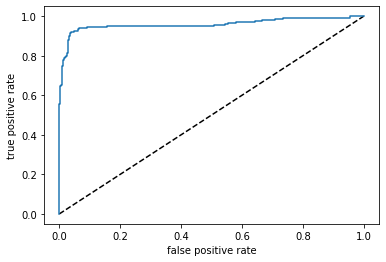

0.9360524512835438


In [197]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='gaussianMB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

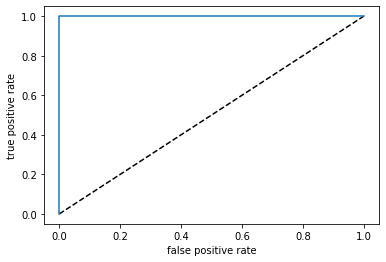

1.0


In [198]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=dtn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,dtn.predict(x_test))
print(auc_score)

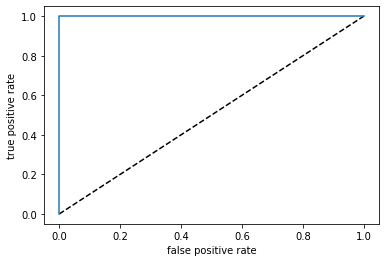

1.0


In [199]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=dct.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='decisionTree')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,dct.predict(x_test))
print(auc_score)

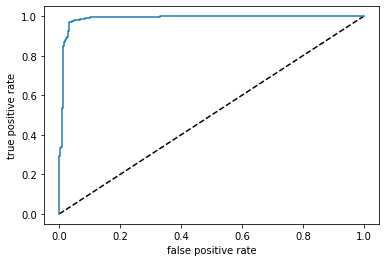

0.9610662446796902


In [202]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

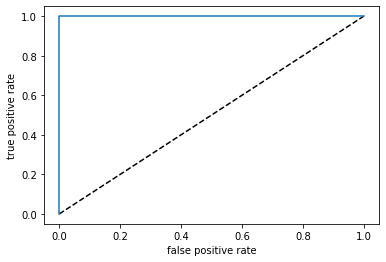

1.0


In [203]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

In [ ]:
#as per my analysis randomforest classifier  and decisionTreeclassifier are having cross_val_score and roc_auc_score

In [205]:
from sklearn.externals import joblib
joblib.dump(dct,'dct.mushroom.pkl')

['dct.mushroom.pkl']

In [206]:
from sklearn.externals import joblib
joblib.dump(rf,'rf.mushroom.pkl')

['rf.mushroom.pkl']